## Previsão de Vendas - Celulares


In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("32.csv", index_col=0)
df.head()

,"ACESSORIO CABO DE FORCA BR 1,80M PRETO M/F C7",ACESSORIO MONOPOD PAU DE SELFIE CABO AMARELO,ACESSORIO MONOPOD PAU DE SELFIE CABO AZUL,ACESSORIO MONOPOD PAU DE SELFIE CABO BRANCO,ACESSORIO MONOPOD PAU DE SELFIE CABO PRETO,ACESSORIO MONOPOD PAU DE SELFIE CABO ROSA,AEREO 120CM 3P CG196 TKA-VERMONT,AEREO CD-211 DUPLO C/NICHO CARV/ONIX UV,AEREO CD-212 QUADRADO 612 CARV/ONIX UV,AEREO GELADEIRA NAPOLI 800X475X305 CARV/BR,...,VENTILADOR VF50 SILENCE FORCE MESA 50CM,VENTILADOR VF52 SILENCE FORCE COLUNA,VENTILADOR VFM2 SIL FORCE VE3230B4,VENTILADOR VFM3 SIL FORCE VE3240B4 PT,VENTILADOR ZEFIRO BLACK 220V MALLORY,VENTILADOR ZEFIRO BR MALLORY,VENTILADOR ZT 401 ZAITEC MATRIX,VIVOBOOK 2G 500 CEL TOUCH ROSA X200MA CT139H,VIVOBOOK 2G 500 CEL TOUCH X200MA CT138H,XXXXXXXXXXXXXXXXXXXXXXXX
2015-01-02,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-03,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-05,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,2.0,0.0,0.0,0.0,NaN
2015-01-06,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-07,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN


Existem 3980 diferentes produtos na base de dados, que compreendem os números de vendas de vários produtos de categorias distintas, porém, como para este caso queremos apenas dos celulares (smartphones), então é feita uma filtragem.

In [3]:
df = df[[x for x in df.columns if "SMARTPHONE" in x]]
              
df.head()

,SMARTPHONE ALCATEL OT 4033 CLARO PRETO,SMARTPHONE ALCATEL PIXI3 4009 DB PRETO,SMARTPHONE ALCATEL PIXI3 4009E CLARO PRETO,SMARTPHONE ALCATEL PIXI4 4034E DB METALLIC,SMARTPHONE ALCATEL PIXI4 4034E DB PRETO,SMARTPHONE ALCATEL PIXI4 4034E LITE DB,SMARTPHONE ALCATEL PIXI4 5010E LITE DB PT,SMARTPHONE ALCATEL POP3 5016 DB PRETO,SMARTPHONE APPLE IPHONE 4S 8GB CLARO PRETO,SMARTPHONE APPLE IPHONE 6S 16GB DB GOLD,...,SMARTPHONE SONY XPERIA E4 DB PRETO,SMARTPHONE SONY XPERIA M C2004 DB BRANCO,SMARTPHONE SONY XPERIA M C2004 DB PRETO,SMARTPHONE SONY XPERIA M2 AQUA DB BRANCO,SMARTPHONE SONY XPERIA M2 AQUA DB PRETO,SMARTPHONE SONY XPERIA M2 DB PRETO,SMARTPHONE ZTE C341 KIS DUAL DB BRANCO,SMARTPHONE ZTE C341 KIS DUAL DB PRETO,SMARTPHONE ZTE L110 BLADE DUAL DB PRETO,SMARTPHONE ZTE L5 SHADE DB CINZA
2015-01-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-01-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-01-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Vejamos quais são os 10 smartphones mais vendidos no período:

In [4]:
su = df.sum()
su = su.sort_values(kind='quicksort', ascending=False)
su[:10]

SMARTPHONE SAMSUNG GAL J1 MINI DB DOURADO        805.0
SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB DR    644.0
SMARTPHONE SAMSUNG GAL J5 J500 DB DOURADO        642.0
SMARTPHONE MOTOROLA MOTO G 16G 1069 2oDTV DB     551.0
SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB RS    504.0
SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO        470.0
SMARTPHONE SAMSUNG GAL J1 MINI DB PRETO          427.0
SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB PT    422.0
SMARTPHONE SAMSUNG GAL J5 PRIME DB DOURADO       385.0
SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO          323.0
dtype: float64

São 9 da Samsung, pertencentes a família 'J' e 1 da Motorola, basicamente, usaremos em diante os smartphones da Samsung da família J.

In [5]:
df = df[[x for x in df.columns if "SMARTPHONE SAMSUNG GAL J" in x]]

df.head()

,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB BCO,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB PRETO,SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO,SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 DB BRANCO,SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 OI BRANCO,...,SMARTPHONE SAMSUNG GAL J7 J710 METAL DB PRETO,SMARTPHONE SAMSUNG GAL J7 NEO DB DOURADO,SMARTPHONE SAMSUNG GAL J7 NEO DB PRETO,SMARTPHONE SAMSUNG GAL J7 PRIME DB DOURADO,SMARTPHONE SAMSUNG GAL J7 PRIME DB PRETO,SMARTPHONE SAMSUNG GAL J7 PRIME DB ROSA,SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB DR,SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB PT,SMARTPHONE SAMSUNG GAL J7 PRO J730 DB DR,SMARTPHONE SAMSUNG GAL J7 PRO J730 DB PT
2015-01-02,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Restaram assim 89 produtos diferentes, nota-se uma presença de vários NaN, que serão substituídos por 0.

In [6]:
df.fillna(value=0, inplace=True)

É feito um ajuste na granularidade, os dados vão desde de 2015-01-01 (quinta) até 2019-05-30 (quarta), ajustar a granularidade para ser feita a medição de vendas com base na soma de vendas de um item por semana, esta iniciando na quinta.

In [7]:
df.index = pd.to_datetime(df.index)

dfw = df.resample('W-THU').sum()
dfw.head()

,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB BCO,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB PRETO,SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO,SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 DB BRANCO,SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 OI BRANCO,...,SMARTPHONE SAMSUNG GAL J7 J710 METAL DB PRETO,SMARTPHONE SAMSUNG GAL J7 NEO DB DOURADO,SMARTPHONE SAMSUNG GAL J7 NEO DB PRETO,SMARTPHONE SAMSUNG GAL J7 PRIME DB DOURADO,SMARTPHONE SAMSUNG GAL J7 PRIME DB PRETO,SMARTPHONE SAMSUNG GAL J7 PRIME DB ROSA,SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB DR,SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB PT,SMARTPHONE SAMSUNG GAL J7 PRO J730 DB DR,SMARTPHONE SAMSUNG GAL J7 PRO J730 DB PT
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Uma análise do comportamento de diferentes celulares vendidos no período, iniciando pela correlação.

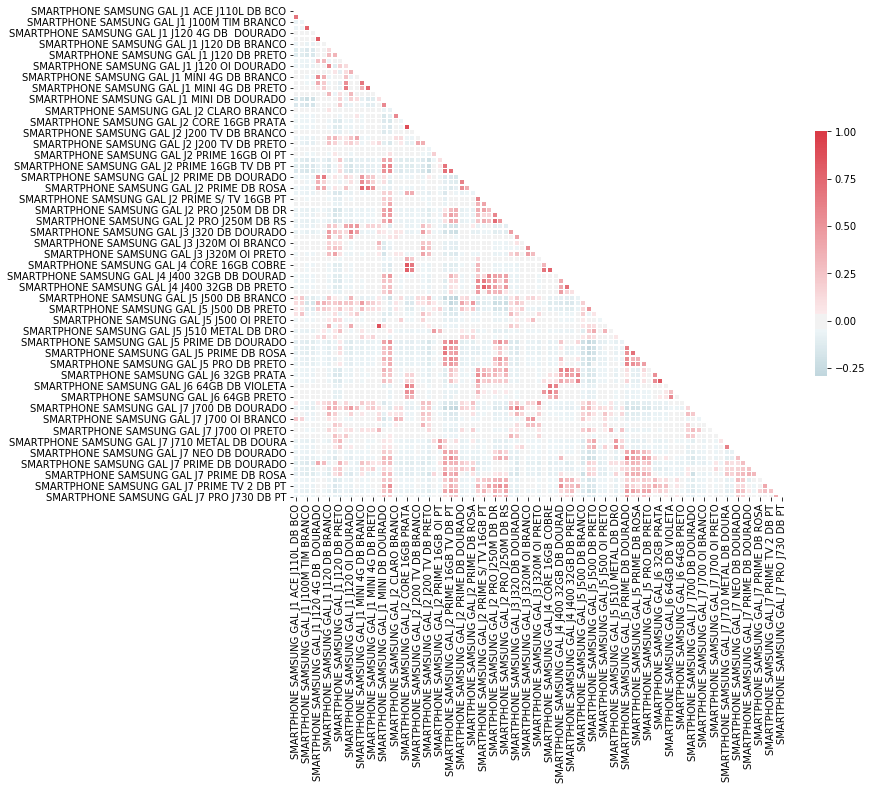

In [8]:
corr = dfw.corr()

# Apenas fazer a plotagem de metade da matriz, pois a matriz é simétrica
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Desenhar a matriz de correlação usando heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

Percebe-se que existem alguns pares com um vermelho mais intenso, o que indica uma forte correlação.

Percebe-se uma correlação forte (p >=0.7) em 14 pares distintos de aparelhos, sendo alguns pares de mesmo modelo só que com cores distintas.

Pares com correlação forte (p >= 0.7): 14


/Users/david/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


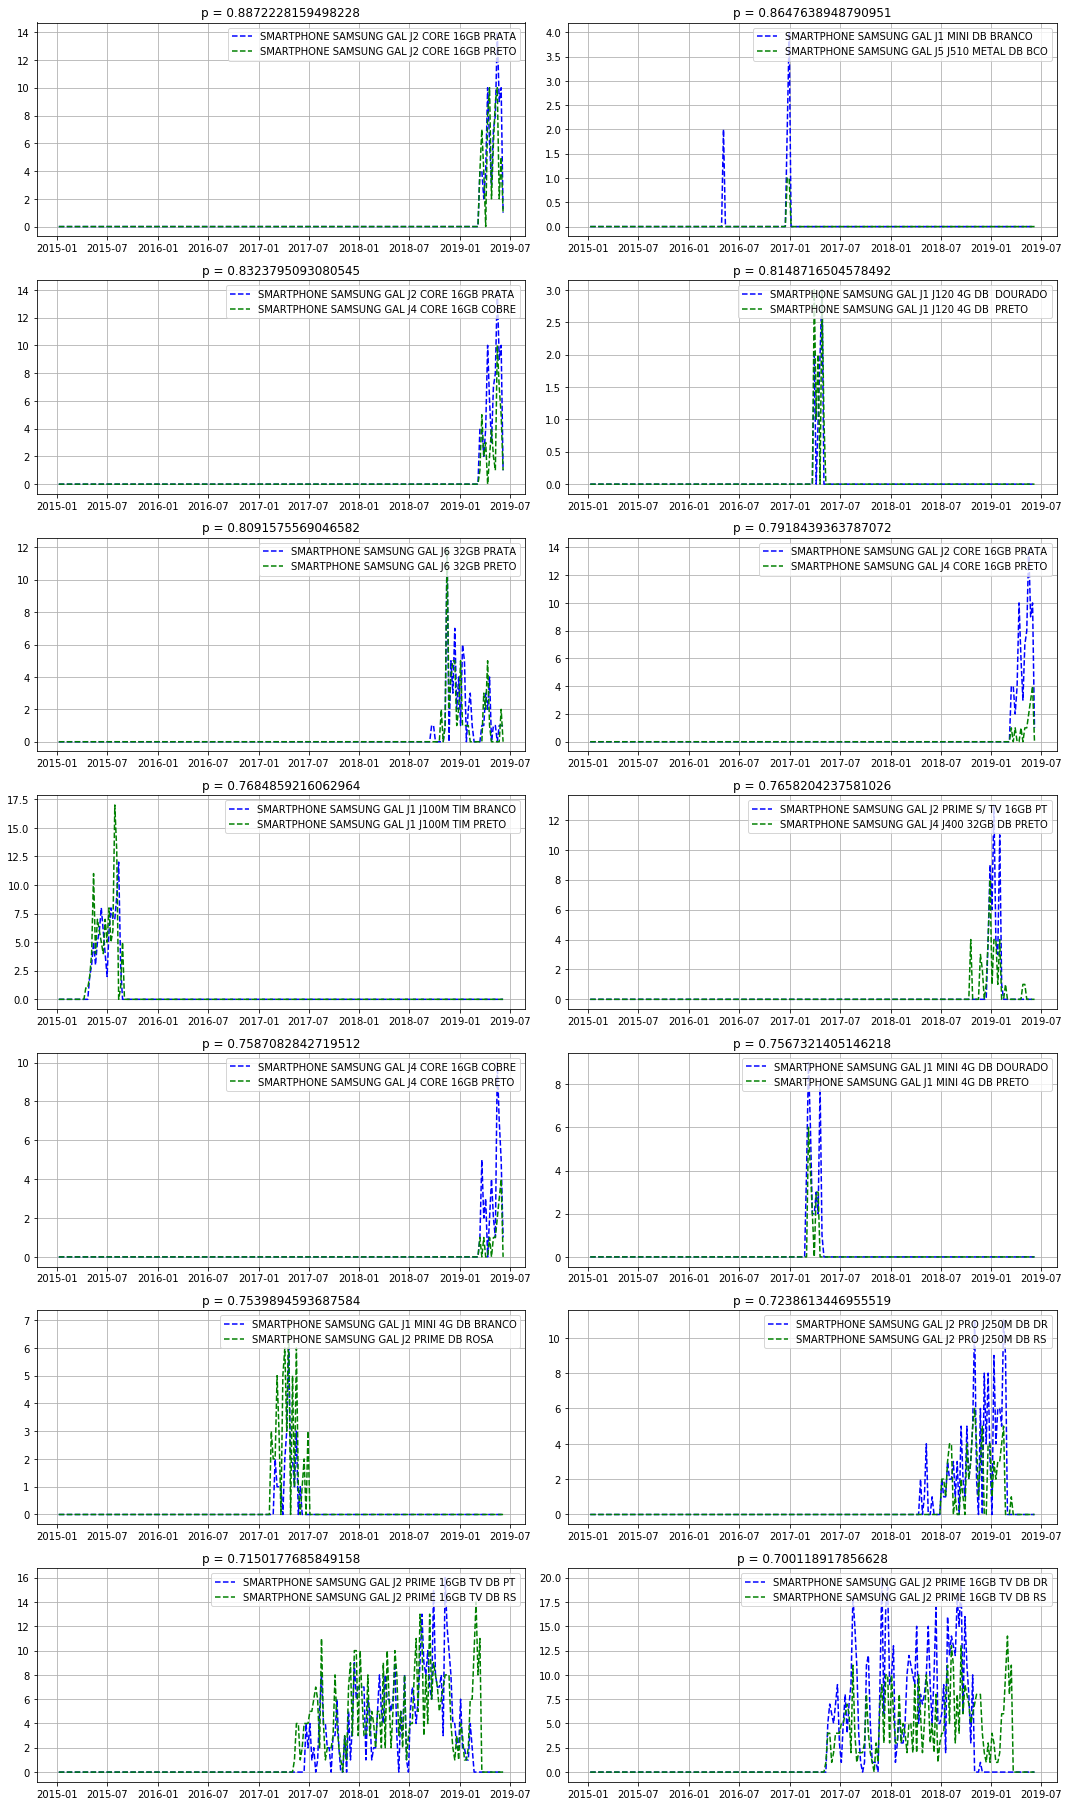

In [9]:
corr.loc[:,:] = np.tril(corr.values, k=-1)

s = corr.unstack()

so = s.sort_values(kind="quicksort", ascending=False)

plt.figure(figsize=(15,50))

num_s = len([x for x in so.tolist() if x >= 0.7])
print("Pares com correlação forte (p >= 0.7): %d" % num_s)

for i in range(num_s):
    plt.subplot(num_s, 2, i+1)
    plt.grid(True)
    plt.plot(dfw[so.index[i][0]], "b--", dfw[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
plt.tight_layout()
plt.show()

Existem 14 pares com correlação forte (p >= 0.7). A análise dos gráficos mostra que alguns dos pares possuem correlação forte por serem modelos iguais de cores distintas. Adicionalmente, em outros casos, pelo baixo número de vendas para tal par, a correlação observada acaba por ser alta, pelo fato das vendas serem concentradas em poucas semanas, sendo nula para o resto, ainda há o caso particular do J2 Core e J4 Core, que foram lançados praticamente no mesmo período [[Fonte J4 Core]](https://www.tudocelular.com/Samsung/fichas-tecnicas/n5032/Samsung-Galaxy-J4-Core.html) [[Fonte J2 Core]](https://www.tudocelular.com/Samsung/fichas-tecnicas/n4795/Samsung-Galaxy-J2-Core.html). Adicionalmente, vejamos a correlação para pares com correlação não-insignificante negativa (p <= -0.2):

Pares com correlação negativa (p <= 0.2): 27 


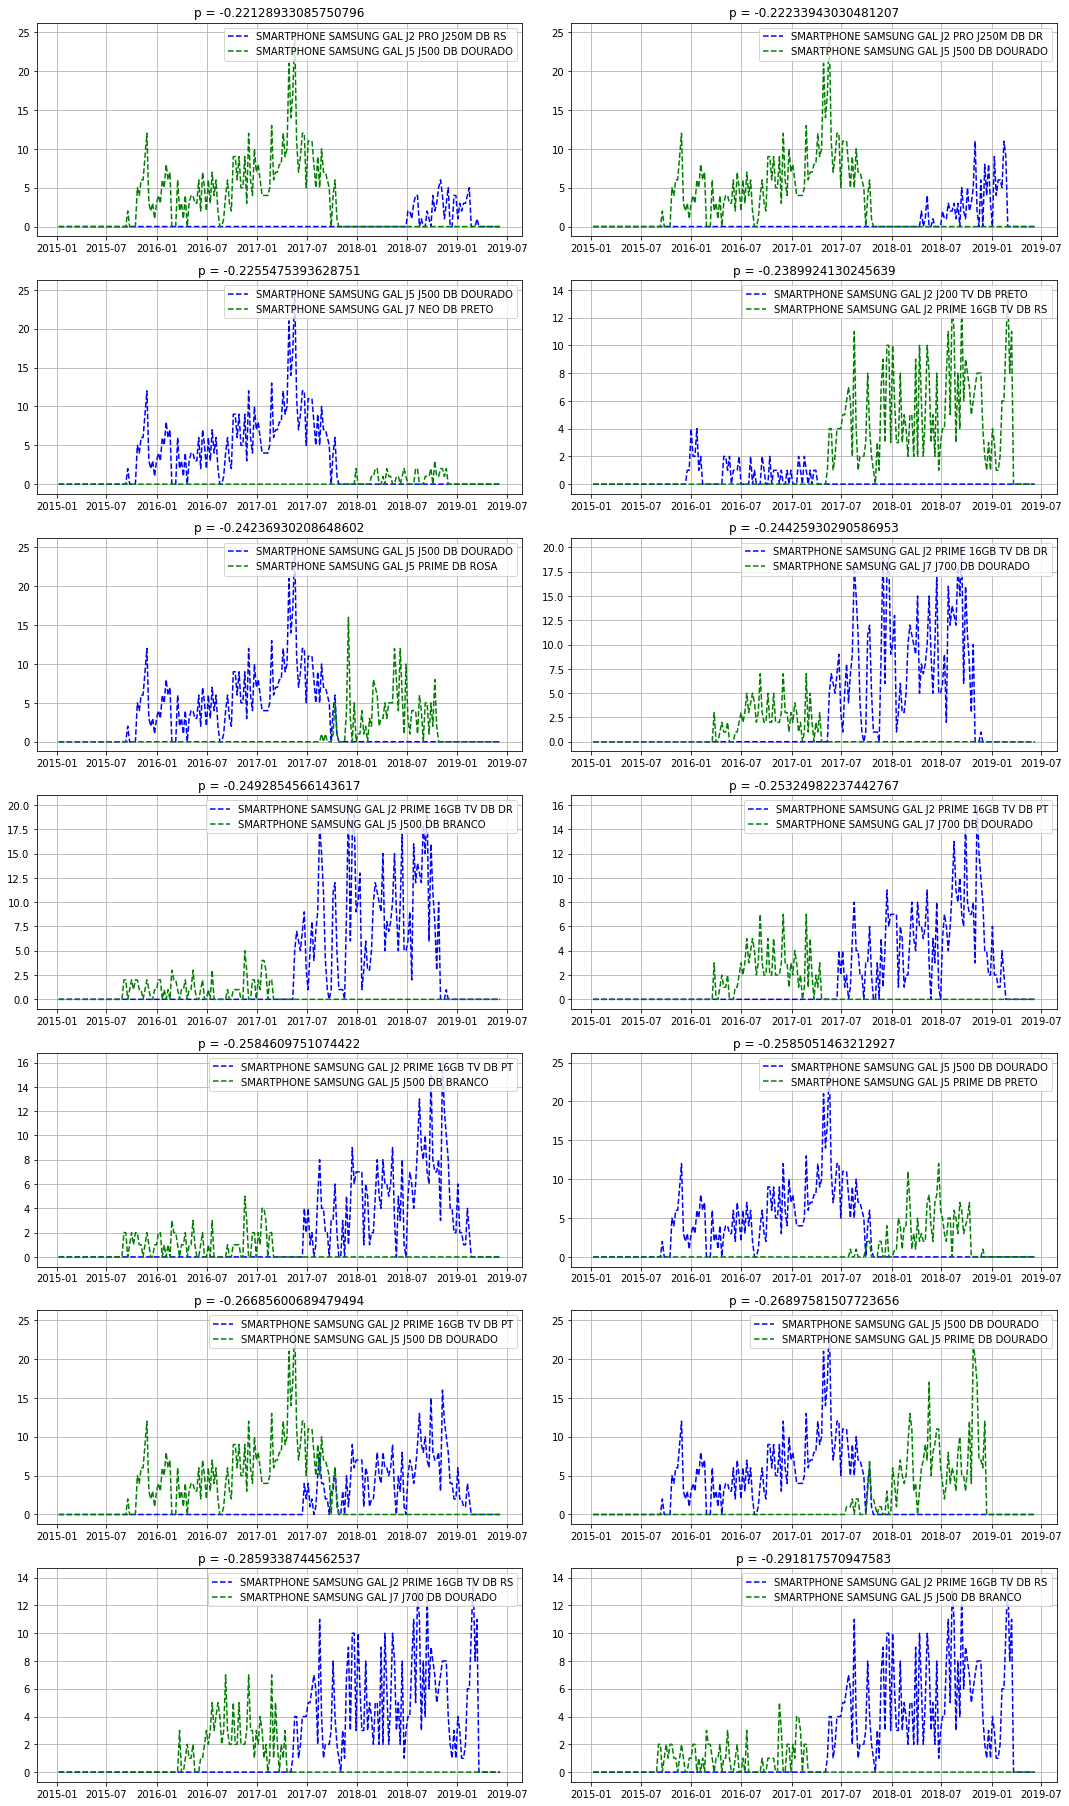

In [10]:
num_n = len([x for x in so.tolist() if x <= -0.2])

print("Pares com correlação negativa (p <= 0.2): %d " % num_n)
plt.figure(figsize=(15,50))

for i in range(len(so)-num_s, len(so)):
    plt.subplot(num_s, 2, i+1-len(so)+num_s)
    plt.grid(True)
    plt.plot(dfw[so.index[i][0]], "b--", dfw[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
    
plt.tight_layout()
plt.show()

Percebe-se que enquanto um sobe nas vendas o outro cai, o que pode sugerir que está ocorrendo uma mudança de geração. Para condensar as informações, juntaremos modelos de aparelhos iguais de cores distintas que possuem uma forte correlação (p >= 0.7):

In [11]:
dfw['j2_core'] = dfw['SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRATA'] + dfw['SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRETO']
dfw['j4_core'] = dfw['SMARTPHONE SAMSUNG GAL J4 CORE 16GB COBRE'] + dfw['SMARTPHONE SAMSUNG GAL J4 CORE 16GB PRETO']
dfw['j1_120'] = dfw['SMARTPHONE SAMSUNG GAL J1 J120 4G DB  DOURADO'] + dfw['SMARTPHONE SAMSUNG GAL J1 J120 4G DB  PRETO']
dfw['j6_32'] = dfw['SMARTPHONE SAMSUNG GAL J6 32GB PRATA'] + dfw['SMARTPHONE SAMSUNG GAL J6 32GB PRETO']
dfw['j1_100m'] = dfw['SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO'] + dfw['SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO']
dfw['j2_prime'] = dfw['SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB PT'] + dfw['SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB RS'] + dfw['SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB DR']
dfw['j2_pro'] = dfw['SMARTPHONE SAMSUNG GAL J2 PRO J250M DB DR'] + dfw['SMARTPHONE SAMSUNG GAL J2 PRO J250M DB RS']

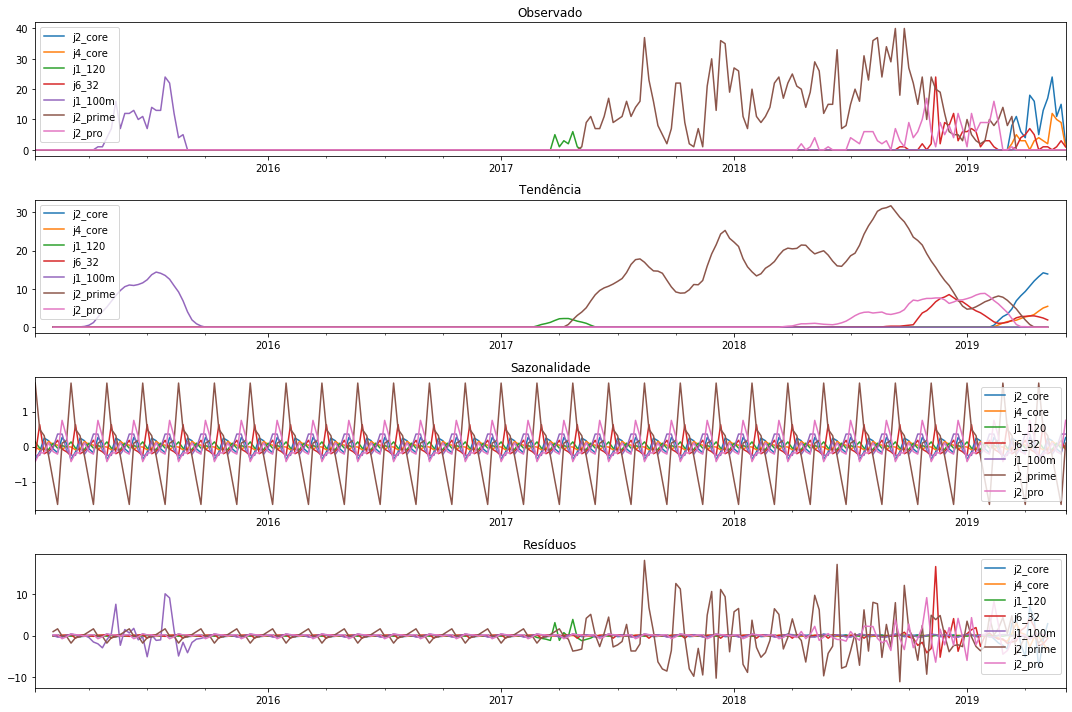

In [12]:
result = seasonal_decompose(dfw[['j2_core', 'j4_core', 'j1_120', 'j6_32', 'j1_100m', 'j2_prime', 'j2_pro']], model = 'additive', freq = 8)

#Cria 4 figs
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(15,10))

#Plota
result.observed.plot(ax = ax1, title = "Observado")
result.trend.plot(ax = ax2, title = "Tendência")
result.seasonal.plot(ax = ax3, title = "Sazonalidade")
result.resid.plot(ax = ax4, title = "Resíduos")

plt.tight_layout()

Pelo gráfico acima, o modelo mais interessante para se fazer experimentos, é o Samsung Galaxy J2 Prime, pois possui 3 cores distintas, com forte correlação entre as vendas de cada, além do período de vendas estar compreendido entre 2017 e 2019. Adicionalmente, pelo gráfico das correlações negativas, percebe-se que os modelos J2 Prime foram os "sucessores" em venda de outros modelos, como é o caso do J5 J500 e o J7 J700, sendo assim, serão agrupados em uma só coluna:

In [13]:
dfw['j2_prime_successor'] = dfw['j2_prime'] + dfw['SMARTPHONE SAMSUNG GAL J7 J700 DB BRANCO'] + dfw['SMARTPHONE SAMSUNG GAL J7 J700 DB DOURADO'] + dfw['SMARTPHONE SAMSUNG GAL J5 J500 DB BRANCO'] + dfw['SMARTPHONE SAMSUNG GAL J5 J500 DB DOURADO']

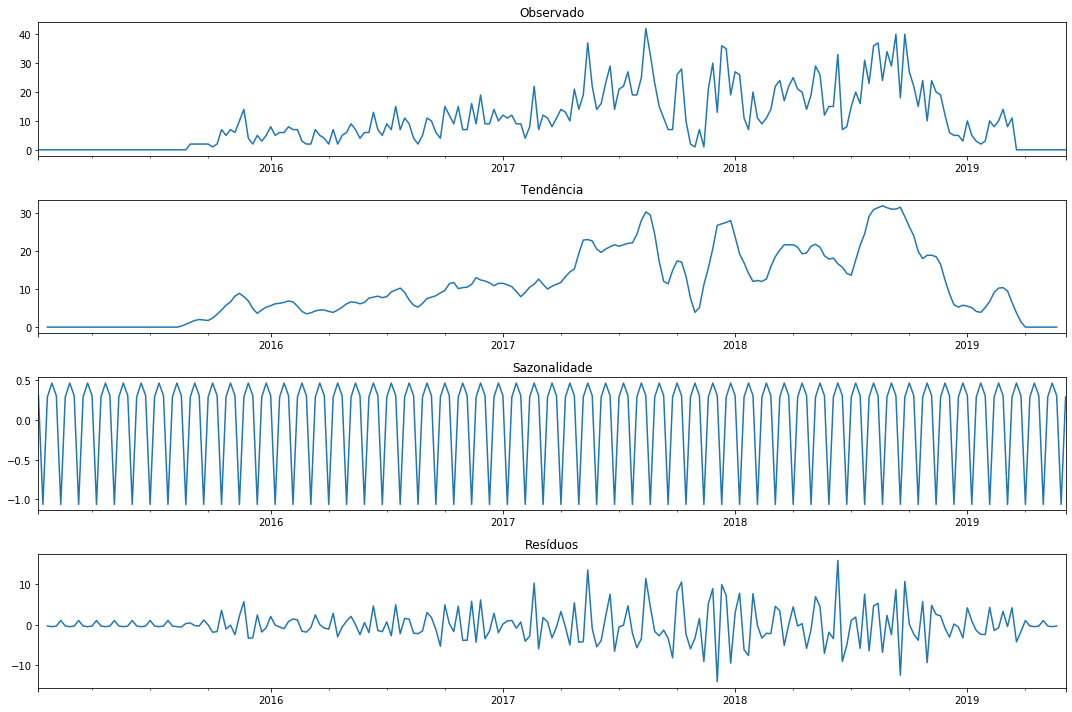

In [14]:
result = seasonal_decompose(dfw['j2_prime_successor'], model = 'additive', freq = 4)

#Cria 4 figs
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(15,10))

#Plota
result.observed.plot(ax = ax1, title = "Observado")
result.trend.plot(ax = ax2, title = "Tendência")
result.seasonal.plot(ax = ax3, title = "Sazonalidade")
result.resid.plot(ax = ax4, title = "Resíduos")

plt.tight_layout()

A adição dos "antecessores" do J2 Prime fez com a série temporal nova contenha valores não nulos em semanas mais antigas.

## Gerando um modelo ARIMA
ARIMA é um dos modelos de série temporal mais utilizados, são utilizados três parâmetros (p, d, q), que respectivamente, compreendem, o termo de autoregressão, ou o atraso do valor anterior (AR), o termo da integral (I) para a diferenciação não-estacionária, e a média móvel (MA) para os termos de erro, este último corresponde ao erro anterior (multiplicado por um coeficiente).


### AR
A autocorrelação parcial em um atraso k é a correlação resultante após a remoção do efeito de qualquer correlação causada por termos em atrasos menores.

Uma maneira de visualizar isso é por meio de um correlograma, que descreve a autocorrelação entre uma observação e outra observação em um passo anterior, que inclui informação de dependência direta e indireta.

Espera-se que o correlograma para um série temporal com AR(k) mostre que a função de autocorrelação seja forte até um atraso de k, e então a incércia de tal relacionamento seria "carregada" para os atrasos subsequentes, até desaparecer em algum ponto.

A função de autocorrelação parcial descreve o relacionamento direto entre uma observação e seu atraso, isso sugere que não existe correlação para atrasos além de k.

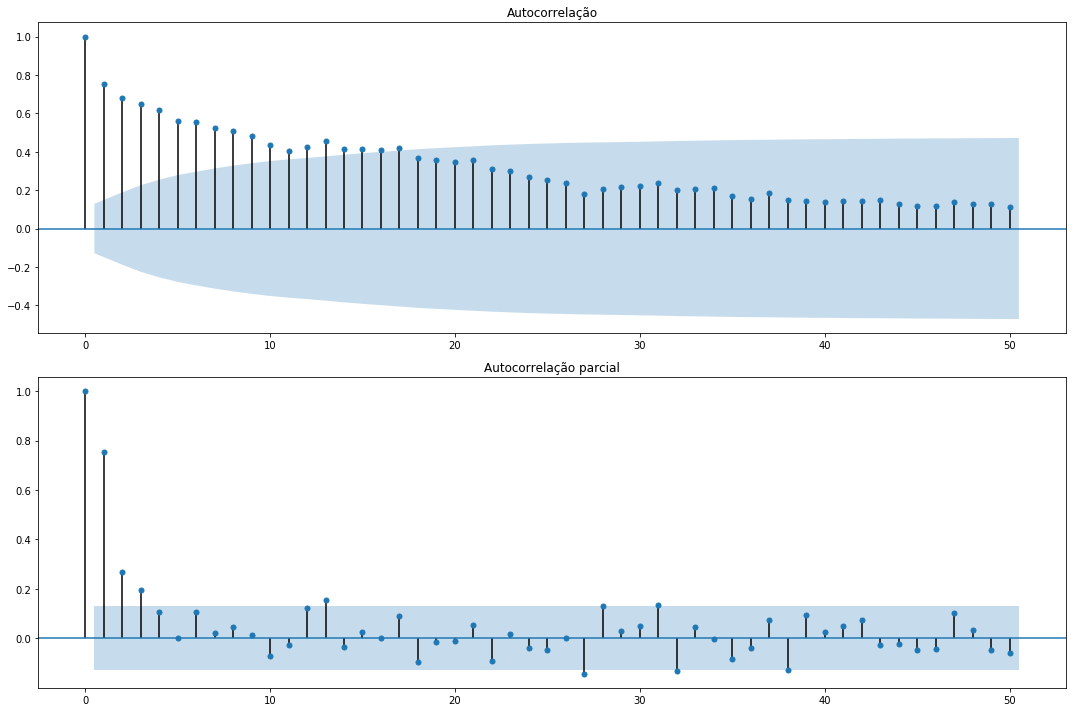

In [15]:
import statsmodels.api as sm

fig, (ax1,ax2) = plt.subplots(2,1, figsize =(15,10))
sm.graphics.tsa.plot_acf(dfw['j2_prime_successor'], lags=50, ax=ax1, title='Autocorrelação')
sm.graphics.tsa.plot_pacf(dfw['j2_prime_successor'], lags=50, ax=ax2, title='Autocorrelação parcial')

plt.tight_layout()

Tanto a função de autocorrelação quanto a de autocorrelação parcial indicam que, não há um padrão de recorrência nos valores observados, o que não indica uma forte sazonalidade nos dados. Valores que estão fora da área azul indicam um correlação e não apenas uma casualidade estatística.

Sendo assim, pela observação, com um atraso de 5, pelo gráfico de correlação parcial, tem-se que a correlação está dentro da faixa que indica uma casualidade estatística. Logo, o <b>p</b> utilizado será 5.

### I
Uma série temporal estacionária, possui a propriedade de não depender do momento nas qual seu valor é observado, ou em outras palavras seja k um intervalo, o valor observado em t será idêntico a t+k, como resultado, a média de uma série temporal estacionária é constante.

Para determinar se uma série temporal é (ou não) estacionária, será utilizado o teste de Dick-Fuller, onde se a 'Estatística do teste' for menor que o 'Valor crítico' a série é estacionária, ou ainda, dado o valor de p do teste, quanto menor ele for, mais provável é da série ser estacionária.

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts, window = 12, cutoff = 0.01):

    # Média móvel e desvio padrão móvel
    rolmean = ts.rolling(window).mean()
    rolstd = ts.rolling(window).std()
    
    print('Resultado do teste de Dickey-Fuller:')
    dftest = adfuller(ts, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Estatística do Teste','p','#Atrasos utilizados','Observações utilizadas'])
    for key,value in dftest[4].items():
        dfoutput['Valor crítico (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p = %.4f. A série é provavelmente estacionária.' % pvalue)
    else:
        print('p = %.4f. A série é provavelmente não-estacionária.' % pvalue)
    
    print(dfoutput)

In [17]:
test_stationarity(dfw['j2_prime_successor'])

Resultado do teste de Dickey-Fuller:
p = 0.0654. A série é provavelmente não-estacionária.
Estatística do Teste       -2.752249
p                           0.065425
#Atrasos utilizados         3.000000
Observações utilizadas    227.000000
Valor crítico (1%)         -3.459490
Valor crítico (5%)         -2.874358
Valor crítico (10%)        -2.573602
dtype: float64


O teste indicou que série é não-estacionária, para um valor crítico de 1%, caso utilizássemos um valor crítico de 10%, ela teria passado pelo teste.

Sendo assim, será aplicada uma diferenciação de grau 1.

In [18]:
dfw1 = dfw['j2_prime_successor'] - dfw['j2_prime_successor'].shift(1)
dfw1 = dfw1.dropna(inplace = False)
test_stationarity(dfw1, window = 12)

Resultado do teste de Dickey-Fuller:
p = 0.0000. A série é provavelmente estacionária.
Estatística do Teste     -9.522087e+00
p                         3.045694e-16
#Atrasos utilizados       4.000000e+00
Observações utilizadas    2.250000e+02
Valor crítico (1%)       -3.459752e+00
Valor crítico (5%)       -2.874473e+00
Valor crítico (10%)      -2.573663e+00
dtype: float64


Para uma diferenciação de grau 1, a série é provavelmente estacionária, sendo assim, podemos definir para esta série o parâmetro <b>d</b> do ARIMA como 1.

Finalmente, montaremos o modelo com os parâmetros especificados anteriormente.

In [19]:
from statsmodels.tsa.arima_model import ARIMA

x = dfw[:'2018-01-01']
y = dfw['2018-01-01':]
model = ARIMA(x['j2_prime_successor'].values, order=(5,1,0))
fitted = model.fit()
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  155
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -484.880
Method:                       css-mle   S.D. of innovations              5.514
Date:                Sun, 27 Dec 2020   AIC                            983.759
Time:                        13:44:30   BIC                           1005.063
Sample:                             1   HQIC                           992.412
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.183      0.922      0.358      -0.190       0.528
ar.L1.D.y     -0.3993      0.080     -4.979      0.000      -0.556      -0.242
ar.L2.D.y     -0.4592      0.084     -5.491      0.0

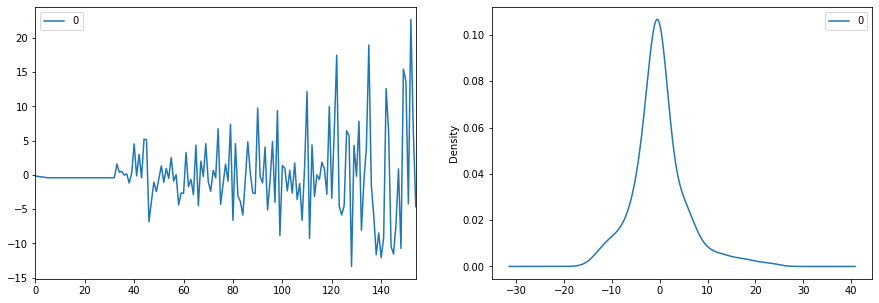

In [20]:
residuals = pd.DataFrame(fitted.resid)
fig, (ax1,ax2) = plt.subplots(1,2, figsize =(15,5))
residuals.plot(ax=ax1)
residuals.plot(kind='kde', ax=ax2)
plt.show()

In [21]:
residuals.describe()

,0
count,155.000000
mean,-0.003096
std,5.532107
min,-13.382400
25%,-2.634082
50%,-0.412384
75%,1.340780
max,22.738865


Temos que os erros do modelo no treino possuem média próxima de 0, e um desvio padrão de 6.41. Pelo segundo gráfico, observa-se que a distribuição dos erros segue uma distribuição gaussiana.

Durante o treinamento utilizou-se dados das vendas até o fim de 2017. Para fins de validação, será feita uma previsão das vendas de cada semana pelo modelo, e então comparado com o valor observado, o valor observado é adicionado ao modelo, que é retreinado com os novos dados, e assim é feita uma previsão da semana seguinte, e assim sucessivamente.

In [22]:
x = dfw['j2_prime_successor'][:'2018-01-01']
y = dfw['j2_prime_successor']['2018-01-01':]
history = [xx for xx in x]
predictions = []
low_conf = []
upp_conf = []

for t in range(len(y)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    predictions.append(output[0])
    low_conf.append(output[2][0][0])
    upp_conf.append(output[2][0][1])
    obs = y[t]
    history.append(obs)

In [23]:
low_conf[0]

14.782498267729203

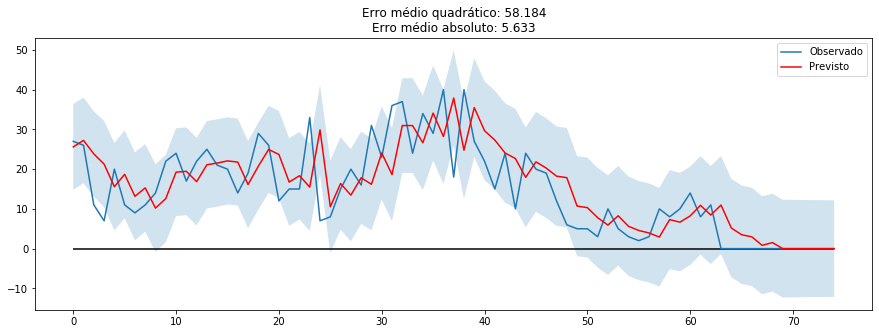

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# evaluate forecasts
s = np.linspace(0, len(predictions)-1, len(predictions))
plt.figure(figsize = (15,5))
plt.plot(y.tolist())
plt.plot(predictions, color='red')
plt.hlines(xmin=0, xmax=len(predictions)-1, y=0, color = 'black')
plt.fill_between(s, y1=low_conf, y2=upp_conf, alpha = 0.2)
plt.legend(['Observado', 'Previsto'], loc ='upper right')
plt.title("Erro médio quadrático: %.3f\nErro médio absoluto: %.3f" % (mean_squared_error(y, predictions), mean_absolute_error(y, predictions)))
plt.show()

O erro médio quadrático foi de 58.184 e o erro médio absoluto foi de 5.633, em relação a previsão média (linha vermelha do gráfico), tem-se que a faixa com o azul claro é o intervalo de confiança de 95%. 

Em relação a média, percebe-se que o modelo errou bastante, porém ao considerar o intervalo de confiança, tem-se que foram poucos os casos em que o observado ficou fora do intervalo, e ainda, em apenas 3 semanas o número de vendas ficou acima do valor máximo do intervalo de confiança. O que indica, se uma loja utilizasse o valor máximo definido no intervalo de confiança para o estoque de tal produto na loja para tal semana, em apenas 4 das 74 semanas previstas, haveria uma falta de estoque.